# Capítulo 3: Regresión lineal

## Objetivos de aprendizaje
<hr>

- Introduction of Model-Building Strategy of a time series
- practice plot skill in python

## 1. Introducción
<hr>

## 2. Modelo estadístico
<hr>

Un modelo de regresión lineal simple parte de la hipótesis de tener una distribución normal (distribución gaussiana) para cada uno de los valores de la variable independiente, pero con una varianza constante y un error no correlacionado para todo el modelo, esto nos permite definir el modelo de dos maneras distintas que se muestran a continuación:


1. En la primera forma se modela la variable dependiente $Y$ como una función de primer orden de la variable dependiente $X$ adicionado un valor aleatorio como representación del error asociado con una distribución $\mathcal{N}(0,\sigma^{2})$.

$$Y_i=\beta_0 + \beta_1X_i + \epsilon_i,\quad \forall \quad \epsilon_i\sim \mathcal{N}(0,\sigma^{2})$$

2. Esta segunda forma se modela la variable dependiente $Y$ como una distribución normal donde la media se define como una función de primer orden, con una varianza constante.

$$Y_i \sim \mathcal{N}(\beta_0 + \beta_1X_i,\sigma^{2})$$


Independientemente de la forma de modelar este modelo la varianza siempre es constante y los parámetros del modelo tienen el mismo vector $\Theta = (\,\beta_0, \beta_1, \sigma)\,^T$, para estimar este vector se suele utilizar los métodos de:
* [Estimación por mínimos cuadrados](#Estimación-por-mínimos-cuadrados)
* [Estimación por máxima verosimilitud](#Estimación-por-máxima-verosimilitud)

La siguiente figura se busca dar claridad como un modelo de regresión lineal sigue una distribución normal con varianza constante.

In [1]:
%load_ext rpy2.ipython

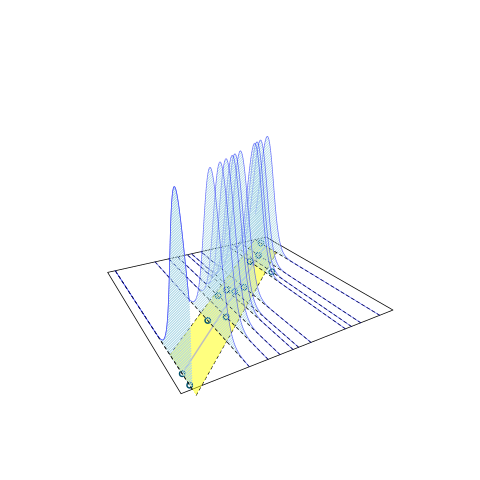

In [2]:
%%R
options( warn = -1 )


linealModelPlot  = function(x, y, model)
{
    xlim = c(min(x)*0.95, max(x)*1.05)
    ylim = c(floor(min(y)*0.95), ceiling(max(y)*1.05))
    b0 = summary(model)$coefficients[1, 1]
    b1 = summary(model)$coefficients[2, 1]
    variance = summary(model)$dispersion
    sd = sqrt(variance)
    y_pred = predict(model, type="response")
    UpPred = qnorm(.95, y_pred, sd)
    LwPred = qnorm(.05, y_pred, sd)
    plotData = lapply(seq(along=x),
                      function(i)
                      {
                           stp <- 251
                           x = rep(x[i], stp)
                           y = seq(ylim[1], ylim[2], length=stp)
                           z0 = rep(0, stp)
                           z = dnorm(y, y_pred[i], sd)
                           return(list(x=x, y=y, z0=z0, z=z))
                      }
                        )
    par(mfrow=c(1,1))
    n = 2
    N = length(y_pred)
    zMax = max(unlist(sapply(plotData, "[[", "z")))*1.5
    mat = persp(xlim, ylim, matrix(0, n, n), zlim=c(0, zMax), theta=-30, ticktype="detailed",box=FALSE)
    C = trans3d(x, UpPred, rep(0, N),mat)
    lines(C, lty=2)
    C = trans3d(x, LwPred, rep(0, N), mat)
    lines(C, lty=2)
    C = trans3d(c(x, rev(x)), c(UpPred, rev(LwPred)), rep(0, 2*N), mat)
    polygon(C, border=NA, col=adjustcolor("yellow", alpha.f = 0.5))
    C = trans3d(x, y_pred, rep(0, N), mat)
    lines(C, lwd=2, col="grey")
    C = trans3d(x, y, rep(0,N), mat)
    points(C, lwd=2, col="#00526D")
    for(j in N:1)
    {
        xp = plotData[[j]]$x
        yp = plotData[[j]]$y
        z0 = plotData[[j]]$z0
        zp = plotData[[j]]$z
        C = trans3d(c(xp, xp), c(yp, rev(yp)), c(zp, z0), mat)
        polygon(C, border=NA, col="light blue", density=40)
        C = trans3d(xp, yp, z0, mat)
        lines(C, lty=2)
        C = trans3d(xp, yp, zp, mat)
        lines(C, col=adjustcolor("blue", alpha.f = 0.5))
    }
}



df = data.frame(temp=c(11.9, 11.9, 15.2, 16.4, 17.2, 18.1, 18.5, 19.4, 22.1, 22.6, 23.4, 25.1),
                      units=c(185, 215, 332, 325, 408, 421, 406, 412, 522, 445, 544, 614)
                     )
market.size = 800
df$opportunity = market.size - df$units

model = glm(units ~ temp, data=df, family=gaussian(link="identity"))
linealModelPlot(x = df$temp, y=df$units, model=model)

Ejemplo hallar un modelo de regresión lineal simple del precio medio de las casas en California respecto a el valor medio de ingresos de la gente en el sector.

In [3]:

import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [4]:
## Load the diabetes dataset
df = pd.read_csv(r"../dataset/diabetes_dataset.csv")

# Use only one feature
# x = df.bmi.values
# y = df.target.values
# cargar formula 
model = smf.ols(formula='target ~ bmi + age', data=df)
fited_model = model.fit()

print(fited_model.summary())

# # Create linear regression object
# regr = linear_model.LinearRegression()

# # Train the model using the training sets
# regr.fit(x, y)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           7.40e-42
Time:                        11:34:32   Log-Likelihood:                -2451.8
No. Observations:                 442   AIC:                             4910.
Df Residuals:                     439   BIC:                             4922.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.962     51.360      0.0

In [5]:
%%R
df = read.csv("../dataset/diabetes_dataset.csv", sep=",")

model <- lm(target ~ bmi, data=df)
summary(model)


Call:
lm(formula = target ~ bmi, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-164.920  -43.572   -8.649   46.344  154.878 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  152.133      2.974   51.16   <2e-16 ***
bmi          949.435     62.515   15.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 62.52 on 440 degrees of freedom
Multiple R-squared:  0.3439,	Adjusted R-squared:  0.3424 
F-statistic: 230.7 on 1 and 440 DF,  p-value: < 2.2e-16



##  Apéndice
<hr>

### Estimación por mínimos cuadrados 

<hr>

La estimación de los mínimos cuadrados se calcula utilizando un ajuste de regresión de una línea recta buscando la optimización del menor error cuadrático medio.


\begin{align*} 
\mathcal{s}(\,\,\beta_0, \beta_1)\,&= \sum_{i=1}^{n}{\epsilon_i}\\
&=\sum_{i=1}^n(y_i-\beta_0-\beta_1x_i)^2 
\end{align*}

Derivando e igualando a cero, es decir,

\begin{align*} 
\frac{\partial S(\beta_0, \beta_1)}{\partial \beta_0}&=0\\
\frac{\partial S(\beta_0, \beta_1)}{\partial \beta_1}&=0
\end{align*}

obtenemos que los estimadores para $\beta_0$ y $\beta_1$:<br>
\begin{gather*} 
\widehat{\beta}_0=\overline{y}-\widehat{\beta}_1\overline{x}\quad \text{y}\quad \widehat{\beta}_1=\frac{S_{xy}}{S_{xx}}
\end{gather*}

donde:

\begin{gather*} 
S_{xx}=\sum_{i=1}^n(x_i-\overline{x})^2\\
S_{yy}=\sum_{i=1}^n(y_i-\overline{y})^2\\
S_{xy}=S_{yx}\\
S_{yx}=\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})
\end{gather*}


### Estimación por máxima verosimilitud

<hr>

El método más común para estimar parámetros es el método de máxima verosimilitud de un modelo donde $X_1,...,X_n$ independientes e idénticamente distribuidas con función de densidad de probabilidad $P(x,\theta)$ entonces se define:

* función de verosimilitud:
\begin{gather*} 
\mathcal{L}(\theta) = \prod_{i=1}^n p(x_i;\theta).
\end{gather*}

* función de log-verosimilitud
\begin{gather*} 
\mathcal{l}(\theta)=\ln \mathcal{L}(\theta)=\sum_{i=1}^n \ln p(x_i; \theta)
\end{gather*}

por ende, el estimador de máxima verosimilitud simplemente es el valor   $\theta $  que maximiza $\mathcal{L}(\theta)$.En el caso particular de un modelo de regresión lineal simple parte de la hipótesis de tener una distribución normal por consíguete su función de densidad se define como:

\begin{gather*}
f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x-\overline{x})^2}{2\sigma^2}\right\}
\end{gather*}

Al remplazar la función de densidad en la ecuación de log-verosimilitud. Se obtiene la siguiente expresión:

\begin{align*}
\mathcal{l}(\theta)=&\sum_{i=1}^n \ln\left(\frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(Y_i-\beta_0-\beta_1X_i)^2}{2\sigma^2}\right\}\right)\\
\mathcal{l}(\theta)=&-\left(\frac{n}{2}\right)\ln(2\pi)-\left(\frac{n}{2}\right)\ln\left(\sigma^2\right)-\left(\frac{1}{2\sigma^2}\right)\sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2
\end{align*}

erivando parcialmente con respecto a $\beta_0$, $\beta_1$ y $\sigma^2$ e igualando a cero, obtenemos los estimadores de máxima verosimilitud:

\begin{align*}
\widetilde{\beta}_0 =&\overline{Y}-\widehat{\beta}_1\overline{X} \\
\widetilde{\beta}_1 =&\frac{S_{xy}}{S_{xx}}\\
\widetilde{\sigma}^2=&\frac{\sum_{i=1}^n(Y_i-\widetilde{\beta}_0-\widetilde{\beta}_1X_i)^2}{n}
\end{align*}

### Notación de Wilkinson y Rogers

<hr>

esta Notación fue introducida por primera vez en [1973](https://www.jstor.org/stable/2346786?seq=1) y adoptada por el lenguaje estadístico R en 1999 y en el 2013 en la librería statsmodels de Python adoptando la librería [patsy](https://patsy.readthedocs.io/en/latest/index.html)    siendo esta la notación mas usada para escribir de forma simbólica un modelo lineal de forma algebraica.

Esta notación tiene gran flexibilidad a continuación se mostrará los operadores que contiene esta notación



| operador |Descripción|
| --- | --- |
| ~ | Separa los lados izquierdo y derecho de una fórmula. |
| + | Calcula una unión de conjuntos. |
| - | Calcula una diferencia de conjuntos. |
| : | toma la unión de factores dentro de dos términos |
| * | a * b = a + b + a:b |
| / | a / b = a + a:b |
| ** | (a + b) ** 2 = (a + b) * (a + b) |


Para dar más claridad a esta notación a continuación se hará una tabla comparativa de algunos ejemplos de utilizando esta notación.


| Notación algebraica | Notación de Wilkinson y Rogers |
|  :-  | :- |
| $ y = \beta_0$ | $ y \sim 1 $ |
| $ y = \beta_0 + \beta_1 x_1$ | $y \sim x_1$|
| $ y = \beta_1 x_1$ | $y \sim x_1 - 1$ |
| $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$ | $ y \sim x_1 + x_2$ |
| $ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$ | $ y \sim x_1 * x_2$ |
| $ y = \beta_0 + \beta_1 x_1 x_2$ | $ y \sim x1:x2$ |
| $ y = \beta_0 + \beta_1\ln(x_1)$ | $ y \sim \ln(x_1)$ |

Nota: para agregar una variable categórica n basta con agregarla con una letra C mayúscula en paréntesis (y ~ x + C(n))